In [1]:
"""
We need to build new columns using greenery, hydration,...area collected from the satelite imagery using the bands thingy

First thing first, building a list for iteration so we ken just iterate thru the stuffs after accessing the planetary computer using pystac_client


Normalized Difference Water Index (NDWI): Higher NDWI, greater presence of water
NDWI = (NIR - SWIR) / (NIR + SWIR)



Band values

B01 = Coastal Aerosol = 60m
B02 = Blue = 10m
B03 = Green = 10m
B04 = Red = 10m
B05 = Red Edge (704 nm) = 20m
B06 = Red Edge (740 nm) = 20m
B07 = Red Edge (780 nm) = 20m
B08 = NIR (833 nm) = 10m
B8A = NIR (narrow 864 nm) = 20m
B11 = SWIR (1.6 um) = 20m
B12 = SWIR (2.2 um) = 20m


Summarised band usage:
B05_RED_EDGE:
Chlorophyl content

NDRE (Better than NDVI):
Better separation from urban areas than RED, more sensitive to UHI
(NIR - Red Edge) / (NIR + Red Edge)

B03_GREEN
differentiate between healthy and stressed vegetation
used in indies like the Green Chlorophyll Vegetation Index (GCVI):
(NIR / GREEN ) - 1

B04_RED
sensitive to vegetation absorption, especially by chlorophyll, and is also useful for distinguishing between vegetation and other land cover types.
important for vegetation detection, land classification, and calculating vegetation indices like NDVI

Normalized Difference Vegetation Index (NDVI): Higher NVDI, greater presence of vegetation
NDVI = (NIR-RED)/(NIR+RED)

B8A_NIR
Helps assess land surface moisture levels (Drier surfaces contribute to higher UHI effects)
differentiates between built-up areas and natural surfaces, aiding in urban classification

B12_SWIR
Effective in distinguishing heat-absorbing materials from cooler surfaces (More sensitive than B11_SWIR)
Helps in detecting impervious surfaces and materials (concrete, asphalt) that contribute to heat islands

B05_RED_EDGE, B03_GREEN, B04_RED, B8A_NIR, B12_SWIR

LANDSAT: B11_IWIR_11 (Land Surface Temp)

Essential for UHI: B11, B12, B8A, B05, B04
Good Additions: B03, B06, B07

"""

'\nWe need to build new columns using greenery, hydration,...area collected from the satelite imagery using the bands thingy\n\nFirst thing first, building a list for iteration so we ken just iterate thru the stuffs after accessing the planetary computer using pystac_client\n\n\nNormalized Difference Water Index (NDWI): Higher NDWI, greater presence of water\nNDWI = (NIR - SWIR) / (NIR + SWIR)\n\n\n\nBand values\n\nB01 = Coastal Aerosol = 60m\nB02 = Blue = 10m\nB03 = Green = 10m\nB04 = Red = 10m\nB05 = Red Edge (704 nm) = 20m\nB06 = Red Edge (740 nm) = 20m\nB07 = Red Edge (780 nm) = 20m\nB08 = NIR (833 nm) = 10m\nB8A = NIR (narrow 864 nm) = 20m\nB11 = SWIR (1.6 um) = 20m\nB12 = SWIR (2.2 um) = 20m\n\n\nSummarised band usage:\nB05_RED_EDGE:\nChlorophyl content\n\nNDRE (Better than NDVI):\nBetter separation from urban areas than RED, more sensitive to UHI\n(NIR - Red Edge) / (NIR + Red Edge)\n\nB03_GREEN\ndifferentiate between healthy and stressed vegetation\nused in indies like the Gree

In [ ]:
!pip install rioxarray==0.15.0
!pip install stackstac==0.5.1
!pip install planetary-computer==1.0.0
!pip install odc-stac==0.3.11
!pip install rasterio==1.3.6
!pip install pystac==1.11.0
!pip install geopandas
!pip install shapely

  Using cached rasterio-1.3.6.tar.gz (408 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      <string>:22: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      INFO:root:Building on Windows requires extra options to setup.py to locate needed GDAL files. More information is available in the README.
      ERROR: A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


     ---------------------------------------- 0.0/987.4 kB ? eta -:--:--
     ------------------------------------- 987.4/987.4 kB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --------------------------- ------------ 8.9/12.9 MB 50.3 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 47.4 MB/s eta 0:00:00
  Created wheel for pydrive: filename=PyDrive-1.3.1-py3-none-any.whl size=27519 sha256=bea320c0494276a08f9280233699e8cf1851444b561837be626948ecae07e9a4
  Stored in directory: c:\users\legion\appdata\local\pip\cache\wheels\6c\10\da\a5b513f5b3916fc391c20ee7b4633e5cf3396d570cdd74970f
Successfully built pydrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

ModuleNotFoundError: No module named 'google.colab'

In [4]:
#Cells may take time to load due to lack of assigned GPU, for this situation, toggle the upper tab and press the icon on Gemini's left,
#there you can click around the resources until it connects you to one

In [5]:
#for casual operations
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as pt
from matplotlib.cm import jet,RdYlGn
import numpy as np
from datetime import datetime

#for the satellites
import stackstac
import pystac_client
import planetary_computer
from odc.stac import stac_load
from shapely.geometry import Polygon


In [2]:
!ls /content/drive/MyDrive/'Colab Notebooks'

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
FILE_PATH_ONE = '/content/drive/MyDrive/Colab Notebooks/Training_data_uhi_index_UHI2025-v2.csv'

df1 = pd.read_csv(FILE_PATH_ONE) #long and lat, may need more data from daddy Kaggle
df1.head(100)

,Longitude,Latitude,datetime,UHI Index
0,-73.909167,40.813107,24-07-2021 15:53,1.030289
1,-73.909187,40.813045,24-07-2021 15:53,1.030289
2,-73.909215,40.812978,24-07-2021 15:53,1.023798
3,-73.909242,40.812908,24-07-2021 15:53,1.023798
4,-73.909257,40.812845,24-07-2021 15:53,1.021634
...,...,...,...,...
95,-73.908298,40.807238,24-07-2021 15:55,1.000237
96,-73.908363,40.807048,24-07-2021 15:56,1.000237
97,-73.908397,40.806955,24-07-2021 15:56,1.000358
98,-73.908428,40.806872,24-07-2021 15:56,1.000358


In [8]:
stac = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")


In [9]:
#function to change to appropriate datetime: removal of hours --> year day month to fit retrieval
def datetime_change(data):
  data['datetime'] = data['datetime'][0:10] #removal of the time component
  parsed_datetime = datetime.strptime(data['datetime'], '%d-%m-%Y')
  #rearrange the day month year component
  rearranged_date_str = parsed_datetime.strftime('%Y-%m-%d')
  return str(rearranged_date_str)


In [10]:
df1.shape

(11229, 4)

In [11]:
"""
Mandy's corner
"""

"\nMandy's corner\n"

In [12]:
"""
Part B:
B05 = Red Edge (704 nm) = 20m
B06 = Red Edge (740 nm) = 20m
B07 = Red Edge (780 nm) = 20m

chlorophyll content, leaf area index (LAI), biomass, nitrogen content, crop growth and pest monitoring, etc.
High Red Edge Index = Healthy vegetation

Shorter red edge wavelengths (e.g., 705 nm) are more sensitive to chlorophyll content.
B05 detect transpiration which helps lower temperature  --> Related to UHI index

Longer red edge wavelengths (e.g., 783 nm) are better for assessing canopy structure and biomass.
Canopy structure provides shade

NDRE (Better than NDVI):
(NIR - Red Edge) / (NIR + Red Edge)

High sensitivity in separating vegetation from urban area than RED, more sensitive to UHI

Source: https://sentera.com/resources/articles/ndvi-vs-ndre-whats-the-difference/



B08 = NIR (833 nm) = 10m

Detects vegetation health --> more healthy, higher NIR

crucial for NDVI and NDWI, but not used alone.


Suggested use: B05 and B07 for early UHI detection

"""

'\nPart B:\nB05 = Red Edge (704 nm) = 20m\nB06 = Red Edge (740 nm) = 20m\nB07 = Red Edge (780 nm) = 20m\n\nchlorophyll content, leaf area index (LAI), biomass, nitrogen content, crop growth and pest monitoring, etc.\nHigh Red Edge Index = Healthy vegetation\n\nShorter red edge wavelengths (e.g., 705 nm) are more sensitive to chlorophyll content.\nB05 detect transpiration which helps lower temperature  --> Related to UHI index\n\nLonger red edge wavelengths (e.g., 783 nm) are better for assessing canopy structure and biomass.\nCanopy structure provides shade\n\nNDRE (Better than NDVI):\n(NIR - Red Edge) / (NIR + Red Edge)\n\nHigh sensitivity in separating vegetation from urban area than RED, more sensitive to UHI\n\nSource: https://sentera.com/resources/articles/ndvi-vs-ndre-whats-the-difference/\n\n\n\nB08 = NIR (833 nm) = 10m\n\nDetects vegetation health --> more healthy, higher NIR\n\ncrucial for NDVI and NDWI, but not used alone.\n\n\nSuggested use: B05 and B07 for early UHI detecti

In [13]:
"""
Stewart's corner
"""

"\nStewart's corner\n"

In [14]:
"""
Part C:
B8A = NIR (narrow 864 nm) = 20m
B11 = SWIR (1.6 um) = 20m
B12 = SWIR (2.2 um) = 20m

B8A (Narrow Near-Infrared - NIR):
- Similar to B08 (NIR) but narrower, providing more precise vegetation health data.
- Why related to UHI?
  1) Detects plant health and density, daddy chill in UHI effects
  2) Can differentiate between vegetation stress and healthy growth better than B08
  3) Helps in identifying areas with strong evapotranspiration, which reduces urban heat effectively

B11 (Short-Wave Infrared 1 - SWIR 1):
- Sensitive to moisture content in soil and vegetation, crucial for identifying heat-retaining areas (drier areas) in urban settings.
- Why related to UHI?
  1) Helps assess land surface moisture levels (Drier surfaces contribute to higher UHI effects)
  2) Differentiates between built-up areas and natural surfaces, aiding in urban classification

B12 (Short-Wave Infrared 2 - SWIR 2):
- Similar to B11 (SWIR) but provides additional data on material properties and clear distinction between different materials.
- Why related to UHI?
  1) Effective in distinguishing heat-absorbing materials from cooler surfaces
  2) Helps in detecting impervious surfaces and materials (concrete, asphalt) that contribute to heat islands

Suggestion:
B8A & B12: Helps differentiate between high-evapotranspiration zones (more sayur) and heat-retaining urban areas (more besi)

Source:
https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/bands/
https://atlas.co/blog/sentinel-bands-and-their-combinations/

"""

'\nPart C:\nB8A = NIR (narrow 864 nm) = 20m\nB11 = SWIR (1.6 um) = 20m\nB12 = SWIR (2.2 um) = 20m\n\nB8A (Narrow Near-Infrared - NIR):\n- Similar to B08 (NIR) but narrower, providing more precise vegetation health data.\n- Why related to UHI?\n  1) Detects plant health and density, daddy chill in UHI effects\n  2) Can differentiate between vegetation stress and healthy growth better than B08\n  3) Helps in identifying areas with strong evapotranspiration, which reduces urban heat effectively\n\nB11 (Short-Wave Infrared 1 - SWIR 1):\n- Sensitive to moisture content in soil and vegetation, crucial for identifying heat-retaining areas (drier areas) in urban settings.\n- Why related to UHI?\n  1) Helps assess land surface moisture levels (Drier surfaces contribute to higher UHI effects)\n  2) Differentiates between built-up areas and natural surfaces, aiding in urban classification\n\nB12 (Short-Wave Infrared 2 - SWIR 2):\n- Similar to B11 (SWIR) but provides additional data on material pr

In [15]:
"""
;) Extra part from ChatGPT:

Top Recommended Bands for UHI Analysis:
1. B11 (SWIR 1 - 1.6µm, 20m)
Why? SWIR is excellent for detecting surface moisture and thermal properties, crucial for identifying heat-retaining areas in urban settings.
UHI Relevance: Drier surfaces tend to retain more heat, while moisture helps cool an area.

2. B12 (SWIR 2 - 2.2µm, 20m)
Why? Works similarly to B11 but provides additional data on material properties and land cover distinctions.
UHI Relevance: Helps in detecting impervious surfaces (concrete, asphalt) that contribute to heat islands.

3. B8A (Narrow NIR - 864nm, 20m)
Why? Detects vegetation health with more precision than regular NIR (B08).
UHI Relevance: Healthy vegetation cools the environment, so this band helps quantify cooling effects.

4. B05 (Red Edge - 705nm, 20m)
Why? Sensitive to plant chlorophyll content and transpiration.
UHI Relevance: Detects heat-mitigating vegetation more effectively than traditional NDVI (which uses B08).

5. B04 (Red - 665nm, 10m)
Why? Used in vegetation indices like NDVI, which indicate cooling effects.
UHI Relevance: Urban areas with little vegetation reflect more red light and tend to be hotter.

6. B03 (Green - 560nm, 10m)
Why? Used for differentiating healthy vegetation from stressed vegetation.
UHI Relevance: Healthy vegetation is key to reducing UHI effects.

Less Critical Bands (Still Useful for Specific Use Cases):
B08 (NIR - 833nm, 10m): General vegetation detection, but B8A is better for finer analysis.
B06, B07 (Red Edge Bands - 740-780nm, 20m): Good for biomass and canopy structure analysis, but less direct in UHI measurement.
B02 (Blue - 490nm, 10m) & B01 (Coastal Aerosol - 443nm, 60m): Primarily used for water and atmospheric analysis, not directly related to UHI.

Final Recommendation:
Essential for UHI: B11, B12, B8A, B05, B04
Good Additions: B03, B06, B07
Less Relevant: B08, B02, B01

"""

'\n;) Extra part from ChatGPT:\n\nTop Recommended Bands for UHI Analysis:\n1. B11 (SWIR 1 - 1.6µm, 20m)\nWhy? SWIR is excellent for detecting surface moisture and thermal properties, crucial for identifying heat-retaining areas in urban settings.\nUHI Relevance: Drier surfaces tend to retain more heat, while moisture helps cool an area.\n\n2. B12 (SWIR 2 - 2.2µm, 20m)\nWhy? Works similarly to B11 but provides additional data on material properties and land cover distinctions.\nUHI Relevance: Helps in detecting impervious surfaces (concrete, asphalt) that contribute to heat islands.\n\n3. B8A (Narrow NIR - 864nm, 20m)\nWhy? Detects vegetation health with more precision than regular NIR (B08).\nUHI Relevance: Healthy vegetation cools the environment, so this band helps quantify cooling effects.\n\n4. B05 (Red Edge - 705nm, 20m)\nWhy? Sensitive to plant chlorophyll content and transpiration.\nUHI Relevance: Detects heat-mitigating vegetation more effectively than traditional NDVI (which u

In [16]:
"""
Kristy's corner
"""

"\nKristy's corner\n"

In [17]:
"""
Part A :
B01 = Coastal Aerosol = 60m
B02 = Blue = 10m
B03 = Green = 10m
B04 = Red = 10m

B01 - imagery allows for coastal water and ocean color observation, as it reflects blues and violets,
      and displays subtle differences in the color of water, and these changes in color intensity can indicate what is mixed in the water.

B02 - measure atmosphere and water
    - Water bodies absorb most of the visible light, so they appear dark blue in the blue band.
    - The blue band can use with coastal aerosol

B03 - useful for vegetation health assessment, and distinguishing between vegetated and non-vegetated areas
    - differentiate between healthy and stressed vegetation
    - healthy vegetation reflects a signifcant amount of light in the green portion of the spectrum
    - used in indies like the Green Chlorophyll Vegetation Index (GDVI)

B04 - sensitive to vegetation absorption, especially by chlorophyll, and is also useful for distinguishing
      between vegetation and other land cover types.
    - In vegetation, healthy plants absorb red light, leading to low reflectance in this band
    - important for vegetation detection, land classification, and calculating vegetation indices like NDVI

UHI:
B03: healthy vegetation -> cooler temperatures -> reduce UHI

BO4: Healthy vegetation absorbs more red light - > cooling -> low red reflectance -> cooler temperature -> reduce UHI
     Urban areas -> little vegetation -> higher red reflectance -> warmer temperature -> more UHI

B02 & B01 is not directly detects UHI

Suggested use:
B03 and B04
"""

'\nPart A :\nB01 = Coastal Aerosol = 60m\nB02 = Blue = 10m\nB03 = Green = 10m\nB04 = Red = 10m\n\nB01 - imagery allows for coastal water and ocean color observation, as it reflects blues and violets,\n      and displays subtle differences in the color of water, and these changes in color intensity can indicate what is mixed in the water.\n\nB02 - measure atmosphere and water\n    - Water bodies absorb most of the visible light, so they appear dark blue in the blue band.\n    - The blue band can use with coastal aerosol\n\nB03 - useful for vegetation health assessment, and distinguishing between vegetated and non-vegetated areas\n    - differentiate between healthy and stressed vegetation\n    - healthy vegetation reflects a signifcant amount of light in the green portion of the spectrum\n    - used in indies like the Green Chlorophyll Vegetation Index (GDVI)\n\nB04 - sensitive to vegetation absorption, especially by chlorophyll, and is also useful for distinguishing\n      between vege

In [18]:
"""
1) Sentinel
2) turn into Geotiff
3) Geotiff turn to train and test model
"""

'\n1) Sentinel\n2) turn into Geotiff\n3) Geotiff turn to train and test model\n'

In [19]:
df1['datetime'].max()

'24-07-2021 15:59'

In [20]:
""" Sentinel part """
# Discover and load the data for analysis
# Define the bounding box for the entire data region using (Latitude, Longitude)
# This is the region of New York City that contains our temperature dataset
lower_left = (40.75, -74.01)
upper_right = (40.88, -73.86)

# Calculate the bounds for doing an archive data search
# bounds = (min_lon, min_lat, max_lon, max_lat)
bounds = (lower_left[1], lower_left[0], upper_right[1], upper_right[0])

# Define the time window
time_window = "2021-06-01/2021-09-01"

In [21]:
# finding the scenes with overall cloud <30%
stac = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

search = stac.search(
    bbox=bounds,
    datetime=time_window,
    collections=["sentinel-2-l2a"],
    query={"eo:cloud_cover": {"lt": 10}},
)

# number of scenes that matches the requirement (overall cloud <30%)
items = list(search.get_items())
print('This is the number of scenes that touch our region:',len(items))

#signed in items
signed_items = [planetary_computer.sign(item).to_dict() for item in items]

# Define the pixel resolution for the final product
# Define the scale according to our selected crs, so we will use degrees
resolution = 30  # meters per pixel
scale = resolution / 111320.0 # degrees per pixel for crs=4326

This is the number of scenes that touch our region: 5


In [22]:
data = stac_load(
    items,
    bands=["B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B11", "B12"],
    crs="EPSG:4326", # Latitude-Longitude
    resolution=scale, # Degrees
    chunks={"x": 2048, "y": 2048},
    dtype="uint16",
    patch_url=planetary_computer.sign,
    bbox=bounds
)

# View the dimensions of our XARRAY and the loaded variables
# This insures we have the right coordinates and spectral bands in our xarray

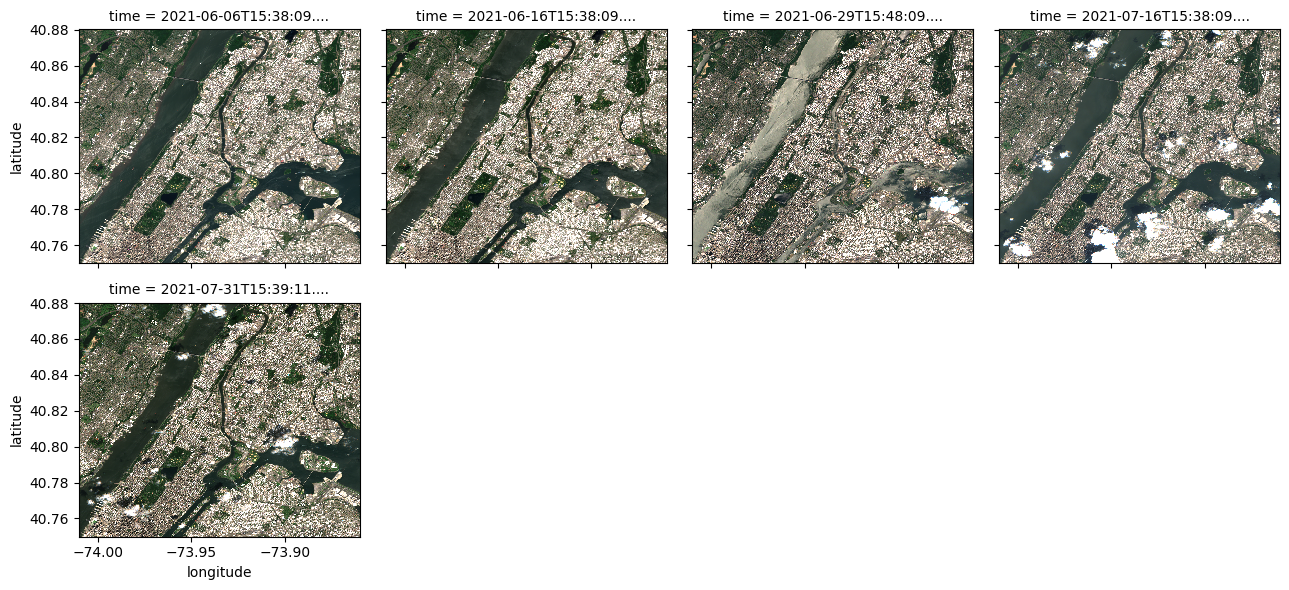

In [23]:
# Plot sample images from the time series
import matplotlib.pyplot as plt
plot_data = data[["B04","B03","B02"]].to_array()
plot_data.plot.imshow(col='time', col_wrap=4, robust=True, vmin=0, vmax=2500)
plt.show()

In [24]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd

# Multi-dimensional arrays and datasets
import xarray as xr

# Geospatial raster data handling
import rioxarray as rxr

# Geospatial data analysis
import geopandas as gpd

# Geospatial operations
import rasterio
from rasterio import windows
from rasterio import features
from rasterio import warp
from rasterio.warp import transform_bounds
from rasterio.windows import from_bounds

# Image Processing
from PIL import Image

# Coordinate transformations
from pyproj import Proj, Transformer, CRS

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Planetary Computer Tools
import pystac_client
import planetary_computer as pc
from pystac.extensions.eo import EOExtension as eo

# Others
import os
from tqdm import tqdm

In [25]:
"""
Save the output data in a GeoTIFF file
"""
filename = "S2_sample.tiff"

data_slice = data.isel(time=2)

# Calculate the dimensions of the file
# height = median.dims["latitude"]
# width = median.dims["longitude"]
height = data_slice.dims["latitude"]
width = data_slice.dims["longitude"]

# Define the Coordinate Reference System (CRS) to be common Lat-Lon coordinates
# Define the tranformation using our bounding box so the Lat-Lon information is written to the GeoTIFF
gt = rasterio.transform.from_bounds(lower_left[1],lower_left[0],upper_right[1],upper_right[0],width,height)
data_slice.rio.write_crs("epsg:4326", inplace=True)
data_slice.rio.write_transform(transform=gt, inplace=True);

# Create the GeoTIFF output file using the defined parameters
with rasterio.open(filename,'w',driver='GTiff',width=width,height=height,
                   crs='epsg:4326',transform=gt,count=11,compress='lzw',dtype='float64') as dst:
    dst.write(data_slice.B01,1)
    dst.write(data_slice.B02,2)
    dst.write(data_slice.B03,3)
    dst.write(data_slice.B04,4)
    dst.write(data_slice.B05,5)
    dst.write(data_slice.B06,6)
    dst.write(data_slice.B07,7)
    dst.write(data_slice.B08,8)
    dst.write(data_slice.B8A,9)
    dst.write(data_slice.B11,10)
    dst.write(data_slice.B12,11)
    dst.close()

# Show the location and size of the new output file
!ls *.tiff

S2_sample.tiff


In [26]:
# Reads and plots all bands from the GeoTIFF file.

# Open the GeoTIFF file
tiff_path = "S2_sample.tiff"

# Read the bands from the GeoTIFF file
with rasterio.open(tiff_path) as src1:
    band1 = src1.read(1)  # Band [B01]
    band2 = src1.read(2)  # Band [B02]
    band3 = src1.read(3)  # Band [B03]
    band4 = src1.read(4)  # Band [B04]
    band5 = src1.read(5)  # Band [B05]
    band6 = src1.read(6)  # Band [B06]
    band7 = src1.read(7)  # Band [B07]
    band8 = src1.read(8)  # Band [B08]
    band8A = src1.read(9)  # Band [B8A]
    band11 = src1.read(10)  # Band [B11]
    band12 = src1.read(11)  # Band [B12]



In [27]:
# Extracts satellite band values from a GeoTIFF based on coordinates from a csv file and returns them in a DataFrame.

def map_satellite_data(tiff_path, csv_path):

    # Load the GeoTIFF data
    data = rxr.open_rasterio(tiff_path)
    tiff_crs = data.rio.crs

    # Read the Excel file using pandas
    df = pd.read_csv(csv_path)
    latitudes = df['Latitude'].values
    longitudes = df['Longitude'].values

    # 3. Convert lat/long to the GeoTIFF's CRS
    # Create a Proj object for EPSG:4326 (WGS84 - lat/long) and the GeoTIFF's CRS
    proj_wgs84 = Proj(init='epsg:4326')  # EPSG:4326 is the common lat/long CRS
    proj_tiff = Proj(tiff_crs)

    # Create a transformer object
    transformer = Transformer.from_proj(proj_wgs84, proj_tiff)

    B01_values = []
    B02_values = []
    B03_values = []
    B04_values = []
    B05_values = []
    B06_values = []
    B07_values = []
    B08_values = []
    B8A_values = []
    B11_values = []
    B12_values = []

# Iterate over the latitudes and longitudes, and extract the corresponding band values
    for lat, lon in tqdm(zip(latitudes, longitudes), total=len(latitudes), desc="Mapping values"):
    # Assuming the correct dimensions are 'y' and 'x' (replace these with actual names from data.coords)

        B01_value = data.sel(x=lon, y=lat,  band=1, method="nearest").values
        B01_values.append(B01_value)

        B02_value = data.sel(x=lon, y=lat,  band=2, method="nearest").values
        B02_values.append(B02_value)

        B03_value = data.sel(x=lon, y=lat, band=3, method="nearest").values
        B03_values.append(B03_value)

        B04_value = data.sel(x=lon, y=lat, band=4, method="nearest").values
        B04_values.append(B04_value)

        B05_value = data.sel(x=lon, y=lat, band=5, method="nearest").values
        B05_values.append(B05_value)

        B06_value = data.sel(x=lon, y=lat, band=6, method="nearest").values
        B06_values.append(B06_value)

        B07_value = data.sel(x=lon, y=lat, band=7, method="nearest").values
        B07_values.append(B07_value)

        B08_value = data.sel(x=lon, y=lat, band=8, method="nearest").values
        B08_values.append(B08_value)

        B8A_value = data.sel(x=lon, y=lat, band=9, method="nearest").values
        B8A_values.append(B8A_value)

        B11_value = data.sel(x=lon, y=lat, band=10, method="nearest").values
        B11_values.append(B11_value)

        B12_value = data.sel(x=lon, y=lat, band=11, method="nearest").values
        B12_values.append(B12_value)

    # Create a DataFrame with the band values
    # Create a DataFrame to store the band values
    df = pd.DataFrame()
    df['B01'] = B01_values
    df['B02'] = B02_values
    df['B03'] = B03_values
    df['B04'] = B04_values
    df['B05'] = B05_values
    df['B06'] = B06_values
    df['B07'] = B07_values
    df['B08'] = B08_values
    df['B8A'] = B8A_values
    df['B11'] = B11_values
    df['B12'] = B12_values

    return df


In [28]:
# Mapping satellite data with training data.
final_data = map_satellite_data('S2_sample.tiff', FILE_PATH_ONE)

Mapping values: 100%|██████████| 11229/11229 [03:05<00:00, 60.53it/s]


In [29]:
final_data.head()

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B11,B12
0,782.0,880.0,959.0,925.0,889.0,1061.0,1280.0,1467.0,1139.0,1289.0,1131.0
1,782.0,880.0,959.0,925.0,889.0,1061.0,1280.0,1467.0,1139.0,1289.0,1131.0
2,782.0,552.0,641.0,640.0,1098.0,1812.0,1979.0,2242.0,2148.0,1530.0,1100.0
3,782.0,552.0,641.0,640.0,1098.0,1812.0,1979.0,2242.0,2148.0,1530.0,1100.0
4,782.0,626.0,718.0,695.0,906.0,1472.0,1680.0,1719.0,1856.0,1391.0,1026.0


In [30]:
final_data['NDVI'] = (final_data['B08'] - final_data['B04']) / (final_data['B08'] + final_data['B04'])
final_data['NDVI'] = final_data['NDVI'].replace([np.inf, -np.inf], np.nan)

final_data['NDBI'] = (final_data['B11'] - final_data['B08']) / (final_data['B11'] + final_data['B08'])
final_data['NDBI'] = final_data['NDBI'].replace([np.inf, -np.inf], np.nan)

final_data['NDWI'] = (final_data['B03'] - final_data['B08']) / (final_data['B03'] + final_data['B08'])
final_data['NDWI'] = final_data['NDWI'].replace([np.inf, -np.inf], np.nan)

final_data['GCVI'] = (final_data['B8A']/final_data['B03']) - 1
final_data['GCVI'] = final_data['GCVI'].replace([np.inf, -np.inf], np.nan)

final_data['NRDE'] = (final_data['B8A'] - final_data['B06']) / (final_data['B8A'] + final_data['B06'])
final_data['NRDE'] = final_data['NRDE'].replace([np.inf, -np.inf], np.nan)

In [31]:
"""
Joining the predictor variable and response variables
"""
# Combine two datasets vertically (along columns) using pandas concat function.
def combine_two_datasets(dataset1,dataset2):
    '''
    Returns a  vertically concatenated dataset.
    Attributes:
    dataset1 - Dataset 1 to be combined
    dataset2 - Dataset 2 to be combined
    '''

    data = pd.concat([dataset1,dataset2], axis=1)
    return data

In [32]:
# Combining ground data and final data into a single dataset.
uhi_data = combine_two_datasets(df1,final_data)
uhi_data.head()

,Longitude,Latitude,datetime,UHI Index,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B11,B12,NDVI,NDBI,NDWI,GCVI,NRDE
0,-73.909167,40.813107,24-07-2021 15:53,1.030289,782.0,880.0,959.0,925.0,889.0,1061.0,1280.0,1467.0,1139.0,1289.0,1131.0,0.226589,-0.064586,-0.209398,0.187696,0.035455
1,-73.909187,40.813045,24-07-2021 15:53,1.030289,782.0,880.0,959.0,925.0,889.0,1061.0,1280.0,1467.0,1139.0,1289.0,1131.0,0.226589,-0.064586,-0.209398,0.187696,0.035455
2,-73.909215,40.812978,24-07-2021 15:53,1.023798,782.0,552.0,641.0,640.0,1098.0,1812.0,1979.0,2242.0,2148.0,1530.0,1100.0,0.555864,-0.188759,-0.555324,2.351014,0.084848
3,-73.909242,40.812908,24-07-2021 15:53,1.023798,782.0,552.0,641.0,640.0,1098.0,1812.0,1979.0,2242.0,2148.0,1530.0,1100.0,0.555864,-0.188759,-0.555324,2.351014,0.084848
4,-73.909257,40.812845,24-07-2021 15:53,1.021634,782.0,626.0,718.0,695.0,906.0,1472.0,1680.0,1719.0,1856.0,1391.0,1026.0,0.424192,-0.105466,-0.410751,1.584958,0.115385


In [33]:
# Resetting the index of the dataset
uhi_data=uhi_data.reset_index(drop=True)

In [34]:
display(uhi_data)

,Longitude,Latitude,datetime,UHI Index,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B11,B12,NDVI,NDBI,NDWI,GCVI,NRDE
0,-73.909167,40.813107,24-07-2021 15:53,1.030289,782.0,880.0,959.0,925.0,889.0,1061.0,1280.0,1467.0,1139.0,1289.0,1131.0,0.226589,-0.064586,-0.209398,0.187696,0.035455
1,-73.909187,40.813045,24-07-2021 15:53,1.030289,782.0,880.0,959.0,925.0,889.0,1061.0,1280.0,1467.0,1139.0,1289.0,1131.0,0.226589,-0.064586,-0.209398,0.187696,0.035455
2,-73.909215,40.812978,24-07-2021 15:53,1.023798,782.0,552.0,641.0,640.0,1098.0,1812.0,1979.0,2242.0,2148.0,1530.0,1100.0,0.555864,-0.188759,-0.555324,2.351014,0.084848
3,-73.909242,40.812908,24-07-2021 15:53,1.023798,782.0,552.0,641.0,640.0,1098.0,1812.0,1979.0,2242.0,2148.0,1530.0,1100.0,0.555864,-0.188759,-0.555324,2.351014,0.084848
4,-73.909257,40.812845,24-07-2021 15:53,1.021634,782.0,626.0,718.0,695.0,906.0,1472.0,1680.0,1719.0,1856.0,1391.0,1026.0,0.424192,-0.105466,-0.410751,1.584958,0.115385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11224,-73.957050,40.790333,24-07-2021 15:57,0.972470,356.0,541.0,703.0,571.0,940.0,2173.0,2874.0,3185.0,3201.0,2061.0,1171.0,0.695953,-0.214258,-0.638374,3.553343,0.191291
11225,-73.957063,40.790308,24-07-2021 15:57,0.972470,356.0,541.0,703.0,571.0,940.0,2173.0,2874.0,3185.0,3201.0,2061.0,1171.0,0.695953,-0.214258,-0.638374,3.553343,0.191291
11226,-73.957093,40.790270,24-07-2021 15:57,0.981124,356.0,423.0,549.0,463.0,958.0,2224.0,2661.0,2687.0,2966.0,1854.0,1134.0,0.706032,-0.183440,-0.660692,4.402550,0.142967
11227,-73.957112,40.790253,24-07-2021 15:59,0.981245,356.0,423.0,549.0,463.0,958.0,2224.0,2661.0,2687.0,2966.0,1854.0,1134.0,0.706032,-0.183440,-0.660692,4.402550,0.142967


In [35]:
"""
Model Building
"""
# Retaining only the columns for B01, B06, NDVI, and UHI Index in the dataset.
uhi_data = uhi_data[['NDVI', 'NDBI', 'NDWI', 'GCVI', 'NRDE','B11', 'B12', 'B8A', 'B05', 'B04','UHI Index']]

In [36]:
display(uhi_data)

,NDVI,NDBI,NDWI,GCVI,NRDE,B11,B12,B8A,B05,B04,UHI Index
0,0.226589,-0.064586,-0.209398,0.187696,0.035455,1289.0,1131.0,1139.0,889.0,925.0,1.030289
1,0.226589,-0.064586,-0.209398,0.187696,0.035455,1289.0,1131.0,1139.0,889.0,925.0,1.030289
2,0.555864,-0.188759,-0.555324,2.351014,0.084848,1530.0,1100.0,2148.0,1098.0,640.0,1.023798
3,0.555864,-0.188759,-0.555324,2.351014,0.084848,1530.0,1100.0,2148.0,1098.0,640.0,1.023798
4,0.424192,-0.105466,-0.410751,1.584958,0.115385,1391.0,1026.0,1856.0,906.0,695.0,1.021634
...,...,...,...,...,...,...,...,...,...,...,...
11224,0.695953,-0.214258,-0.638374,3.553343,0.191291,2061.0,1171.0,3201.0,940.0,571.0,0.972470
11225,0.695953,-0.214258,-0.638374,3.553343,0.191291,2061.0,1171.0,3201.0,940.0,571.0,0.972470
11226,0.706032,-0.183440,-0.660692,4.402550,0.142967,1854.0,1134.0,2966.0,958.0,463.0,0.981124
11227,0.706032,-0.183440,-0.660692,4.402550,0.142967,1854.0,1134.0,2966.0,958.0,463.0,0.981245


In [37]:
"""
Train and Test Split
"""
# Split the data into features (X) and target (y), and then into training and testing sets
X = uhi_data.drop(columns=['UHI Index']).values
y = uhi_data ['UHI Index'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)

In [38]:
# Scale the training and test data using standardscaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
"""
Model Training
"""
# Train the Random Forest model on the training data
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [40]:
"""
Model Evaluation
"""
# Make predictions on the training data
# insample_prediction
insample_predictions = model.predict(X_train)

In [41]:
# calculate R-squared score for in-sample predictions
Y_train = y_train.tolist()
r2_score(Y_train, insample_predictions)

0.9551123434119355

In [42]:
# outsampl_prediction
# Make predictions on the test data
outsample_predictions = model.predict(X_test)

In [43]:
# calculate R-squared score for out-sample predictions
Y_test = y_test.tolist()
r2_score(Y_test, outsample_predictions)

0.7578681969677312

In [44]:
"""
Submission
"""
Submission_template = '/content/drive/MyDrive/Colab Notebooks/Submission_template_UHI2025-v2.csv'

In [45]:
#Reading the coordinates for the submission
test_file = pd.read_csv(Submission_template)
test_file.head()

,Longitude,Latitude,UHI Index
0,-73.971665,40.788763,NaN
1,-73.971928,40.788875,NaN
2,-73.967080,40.789080,NaN
3,-73.972550,40.789082,NaN
4,-73.969697,40.787953,NaN


In [46]:
# Mapping satellite data for submission.
val_data = map_satellite_data('S2_sample.tiff',Submission_template )

Mapping values: 100%|██████████| 1040/1040 [00:16<00:00, 64.21it/s]


In [47]:
# Calculate NDVI (Normalized Difference Vegetation Index) and handle division by zero by replacing infinities with NaN.
val_data['NDVI'] = (val_data['B08'] - val_data['B04']) / (val_data['B08'] + val_data['B04'])
val_data['NDVI'] = val_data['NDVI'].replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN

# Calculate NDBI (Normalized Difference Buildup Index) and handle division by zero by replacing infinities with NaN
val_data['NDBI'] = (val_data['B11'] - val_data['B08']) / (val_data['B11'] + val_data['B08'])
val_data['NDBI'] = val_data['NDBI'].replace([np.inf, -np.inf], np.nan)

# Calculate NDWI (Normalized Difference Water Index) and handle division by zero by replacing infinities with NaN
val_data['NDWI'] = (val_data['B03'] - val_data['B08']) / (val_data['B03'] + val_data['B08'])
val_data['NDWI'] = val_data['NDWI'].replace([np.inf, -np.inf], np.nan)

val_data['GCVI'] = (val_data['B8A']/val_data['B03']) - 1
val_data['GCVI'] = val_data['GCVI'].replace([np.inf, -np.inf], np.nan)

val_data['NRDE'] = (val_data['B8A'] - val_data['B06']) / (val_data['B8A'] + val_data['B06'])
val_data['NRDE'] = val_data['NRDE'].replace([np.inf, -np.inf], np.nan)

In [48]:
val_data.head()

,B01,B02,B03,B04,B05,B06,B07,B08,B8A,B11,B12,NDVI,NDBI,NDWI,GCVI,NRDE
0,703.0,539.0,640.0,533.0,903.0,1938.0,2318.0,1794.0,2407.0,1537.0,983.0,0.541899,-0.077154,-0.474117,2.760937,0.107940
1,1131.0,823.0,934.0,1047.0,1137.0,1868.0,2138.0,2025.0,2282.0,1644.0,1180.0,0.318359,-0.103843,-0.368706,1.443255,0.099759
2,972.0,834.0,895.0,956.0,907.0,1037.0,1201.0,1120.0,1082.0,1415.0,1220.0,0.078998,0.116371,-0.111663,0.208939,0.021236
3,1011.0,1020.0,1296.0,1439.0,1976.0,2041.0,2178.0,1613.0,2520.0,3043.0,2970.0,0.057012,0.307131,-0.108972,0.944444,0.105021
4,1153.0,494.0,740.0,671.0,1787.0,2898.0,3129.0,2363.0,2997.0,2734.0,2280.0,0.557680,0.072788,-0.523042,3.050000,0.016794


In [50]:
# Extracting specific columns (B01, B06, and NDVI) from the validation dataset
submission_val_data=val_data.loc[:,['NDVI', 'NDBI', 'NDWI', 'GCVI', 'NRDE','B11', 'B12', 'B8A', 'B05', 'B04']]
submission_val_data.head()

,NDVI,NDBI,NDWI,GCVI,NRDE,B11,B12,B8A,B05,B04
0,0.541899,-0.077154,-0.474117,2.760937,0.107940,1537.0,983.0,2407.0,903.0,533.0
1,0.318359,-0.103843,-0.368706,1.443255,0.099759,1644.0,1180.0,2282.0,1137.0,1047.0
2,0.078998,0.116371,-0.111663,0.208939,0.021236,1415.0,1220.0,1082.0,907.0,956.0
3,0.057012,0.307131,-0.108972,0.944444,0.105021,3043.0,2970.0,2520.0,1976.0,1439.0
4,0.557680,0.072788,-0.523042,3.050000,0.016794,2734.0,2280.0,2997.0,1787.0,671.0


In [51]:
# Feature Scaling
submission_val_data = submission_val_data.values
transformed_submission_data = sc.transform(submission_val_data)

#Making predictions
final_predictions = model.predict(transformed_submission_data)
final_prediction_series = pd.Series(final_predictions)

#Combining the results into dataframe
submission_df = pd.DataFrame({'Longitude':test_file['Longitude'].values, 'Latitude':test_file['Latitude'].values, 'UHI Index':final_prediction_series.values})

#Displaying the sample submission dataframe
submission_df.head()


,Longitude,Latitude,UHI Index
0,-73.971665,40.788763,0.970874
1,-73.971928,40.788875,0.965570
2,-73.967080,40.789080,0.964538
3,-73.972550,40.789082,0.974996
4,-73.969697,40.787953,0.963336


In [52]:
#Dumping the predictions into a csv file.
#finish for the modeling
file_path = '/content/drive/MyDrive/Colab Notebooks/submission_df_trial3.csv'
submission_df.to_csv(file_path, index = False)